In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Define the phonemes (hidden states)
states = ['/s/', '/p/', '/ie:/', '/tS/']
n_states = len(states)

# Define observations (acoustic properties)
observations = ['Low Energy', 'Medium Energy', 'High Energy', 
                'Low Pitch', 'Medium Pitch', 'High Pitch',
                'Short Duration', 'Medium Duration', 'Long Duration']
n_observations = len(observations)

# Initial State Probability (starting with /s/)
initial_prob = np.array([1.0, 0.0, 0.0, 0.0])

print("Hidden States (Phonemes):")
for i, state in enumerate(states):
    print(f"  {i}: {state}")
    
print(f"\nObservations (Acoustic Properties):")
for i, obs in enumerate(observations):
    print(f"  {i}: {obs}")
    
print(f"\nInitial Probabilities:")
for i, state in enumerate(states):
    print(f"  {state}: {initial_prob[i]}")

Hidden States (Phonemes):
  0: /s/
  1: /p/
  2: /ie:/
  3: /tS/

Observations (Acoustic Properties):
  0: Low Energy
  1: Medium Energy
  2: High Energy
  3: Low Pitch
  4: Medium Pitch
  5: High Pitch
  6: Short Duration
  7: Medium Duration
  8: Long Duration

Initial Probabilities:
  /s/: 1.0
  /p/: 0.0
  /ie:/: 0.0
  /tS/: 0.0


In [4]:
# Transition Probability Matrix
# Rows: current state, Columns: next state
# A[i][j] = P(next_state = j | current_state = i)

transition_matrix = np.array([
    [0.2, 0.7, 0.1, 0.0],  # From /s/
    [0.0, 0.2, 0.7, 0.1],  # From /p/
    [0.0, 0.0, 0.3, 0.7],  # From /ie:/
    [0.0, 0.0, 0.0, 1.0]   # From /tS/ (absorbing state)
])

# Create DataFrame for better visualization
transition_df = pd.DataFrame(
    transition_matrix,
    index=states,
    columns=states
)

print("Transition Probability Matrix:")
print("=" * 50)
print(transition_df)
print("\n")

# Verify that each row sums to 1
row_sums = transition_matrix.sum(axis=1)
print("Row sums (should all be 1.0):")
for i, state in enumerate(states):
    print(f"  {state}: {row_sums[i]:.2f}")

Transition Probability Matrix:
       /s/  /p/  /ie:/  /tS/
/s/    0.2  0.7    0.1   0.0
/p/    0.0  0.2    0.7   0.1
/ie:/  0.0  0.0    0.3   0.7
/tS/   0.0  0.0    0.0   1.0


Row sums (should all be 1.0):
  /s/: 1.00
  /p/: 1.00
  /ie:/: 1.00
  /tS/: 1.00


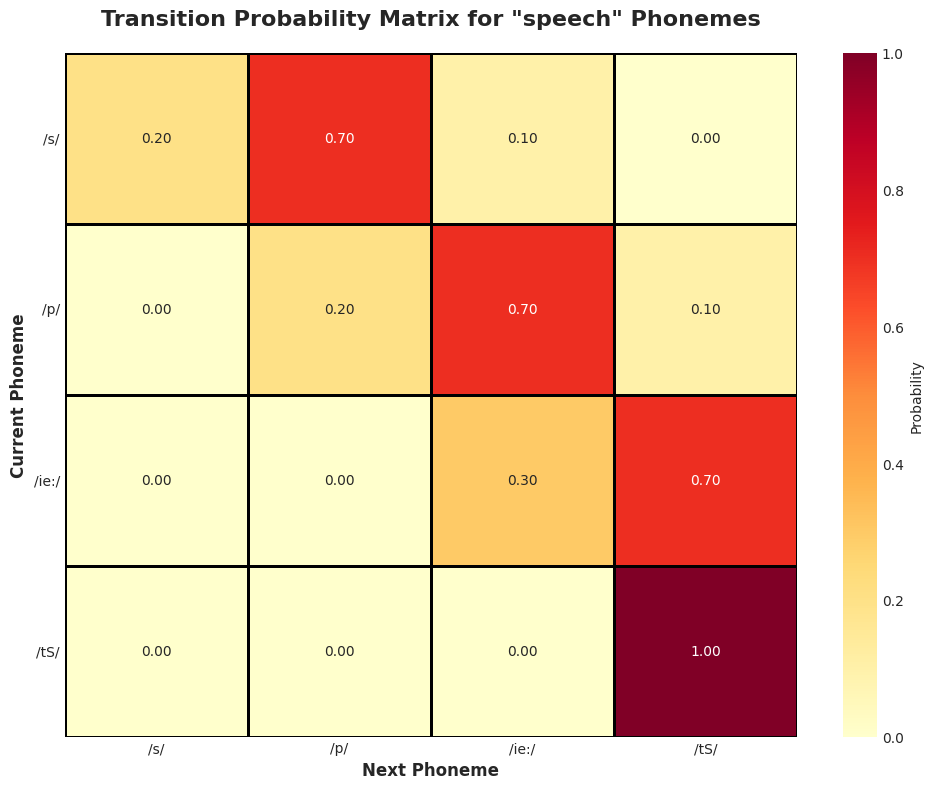

In [5]:
# Create a heatmap for transition probabilities
plt.figure(figsize=(10, 8))
sns.heatmap(transition_df, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Probability'}, linewidths=2, linecolor='black',
            vmin=0, vmax=1)
plt.title('Transition Probability Matrix for "speech" Phonemes', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Next Phoneme', fontsize=12, fontweight='bold')
plt.ylabel('Current Phoneme', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

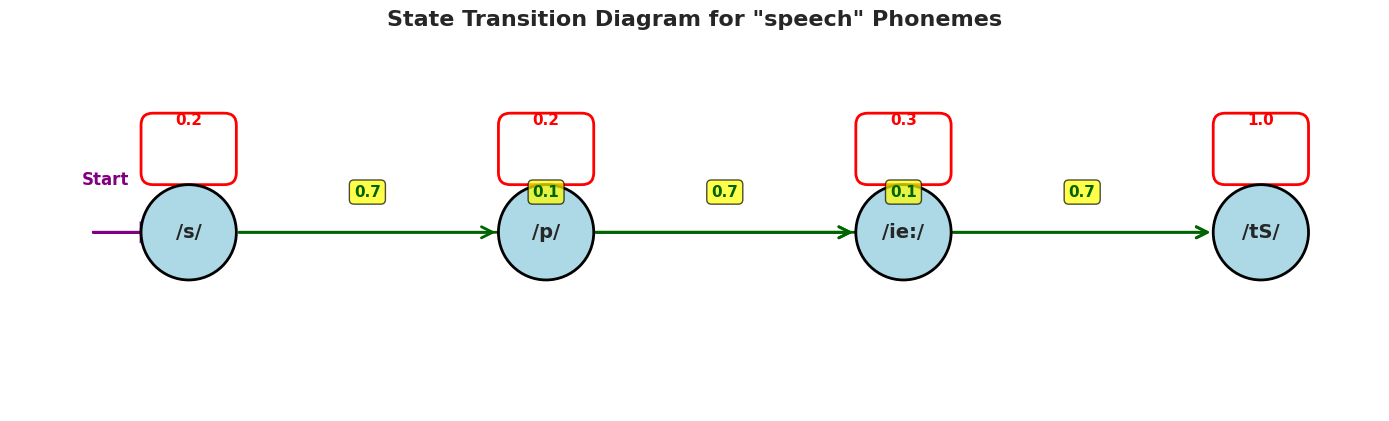

In [8]:
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch

# Create state transition diagram
fig, ax = plt.subplots(figsize=(14, 8))

# Define positions for states
positions = {
    '/s/': (1, 3),
    '/p/': (4, 3),
    '/ie:/': (7, 3),
    '/tS/': (10, 3)
}

# Draw states as circles
for state, (x, y) in positions.items():
    circle = plt.Circle((x, y), 0.4, color='lightblue', ec='black', linewidth=2, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, state, ha='center', va='center', fontsize=14, fontweight='bold', zorder=4)

# Draw transitions with arrows
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = transition_matrix[i][j]
        if prob > 0:
            x1, y1 = positions[from_state]
            x2, y2 = positions[to_state]
            
            if from_state == to_state:
                # Self-loop
                arc = mpatches.FancyBboxPatch((x1-0.3, y1+0.5), 0.6, 0.4,
                                              boxstyle="round,pad=0.1",
                                              linewidth=2, edgecolor='red',
                                              facecolor='none')
                ax.add_patch(arc)
                ax.text(x1, y1+0.9, f'{prob:.1f}', ha='center', fontsize=11, 
                       fontweight='bold', color='red')
            else:
                # Arrow between states
                dx = x2 - x1
                dy = y2 - y1
                
                # Adjust arrow start and end positions
                arrow_start_x = x1 + 0.4 * dx / abs(dx) if dx != 0 else x1
                arrow_end_x = x2 - 0.4 * dx / abs(dx) if dx != 0 else x2
                
                arrow = FancyArrowPatch((arrow_start_x, y1), (arrow_end_x, y2),
                                       arrowstyle='->', mutation_scale=20, 
                                       linewidth=2, color='darkgreen', zorder=2)
                ax.add_patch(arrow)
                
                # Label
                mid_x = (x1 + x2) / 2
                mid_y = (y1 + y2) / 2 + 0.3
                ax.text(mid_x, mid_y, f'{prob:.1f}', ha='center', fontsize=11,
                       fontweight='bold', color='darkgreen',
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Add initial state indicator
ax.arrow(0.2, 3, 0.4, 0, head_width=0.15, head_length=0.15, 
         fc='purple', ec='purple', linewidth=2)
ax.text(0.1, 3.4, 'Start', fontsize=12, fontweight='bold', color='purple')

ax.set_xlim(-0.5, 11)
ax.set_ylim(1.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('State Transition Diagram for "speech" Phonemes', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [9]:
# Emission Probability Matrix
# Rows: states (phonemes), Columns: observations (acoustic properties)
# B[i][j] = P(observation = j | state = i)

emission_matrix = np.array([
    # /s/: fricative (high energy, medium pitch, short duration)
    [0.1, 0.2, 0.7, 0.2, 0.6, 0.2, 0.7, 0.2, 0.1],
    
    # /p/: plosive (low energy, low pitch, short duration)
    [0.7, 0.2, 0.1, 0.7, 0.2, 0.1, 0.8, 0.15, 0.05],
    
    # /ie:/: vowel (medium/high energy, varied pitch, long duration)
    [0.1, 0.4, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2, 0.7],
    
    # /tS/: affricate (medium energy, medium pitch, medium duration)
    [0.2, 0.5, 0.3, 0.2, 0.6, 0.2, 0.2, 0.6, 0.2]
])

# Normalize each row to sum to 1
emission_matrix = emission_matrix / emission_matrix.sum(axis=1, keepdims=True)

# Create DataFrame
emission_df = pd.DataFrame(
    emission_matrix,
    index=states,
    columns=observations
)

print("Emission Probability Matrix:")
print("=" * 100)
print(emission_df)
print("\n")

# Verify that each row sums to 1
row_sums = emission_matrix.sum(axis=1)
print("Row sums (should all be 1.0):")
for i, state in enumerate(states):
    print(f"  {state}: {row_sums[i]:.4f}")

Emission Probability Matrix:
       Low Energy  Medium Energy  High Energy  Low Pitch  Medium Pitch  \
/s/      0.033333       0.066667     0.233333   0.066667      0.200000   
/p/      0.233333       0.066667     0.033333   0.233333      0.066667   
/ie:/    0.033333       0.133333     0.166667   0.066667      0.133333   
/tS/     0.066667       0.166667     0.100000   0.066667      0.200000   

       High Pitch  Short Duration  Medium Duration  Long Duration  
/s/      0.066667        0.233333         0.066667       0.033333  
/p/      0.033333        0.266667         0.050000       0.016667  
/ie:/    0.133333        0.033333         0.066667       0.233333  
/tS/     0.066667        0.066667         0.200000       0.066667  


Row sums (should all be 1.0):
  /s/: 1.0000
  /p/: 1.0000
  /ie:/: 1.0000
  /tS/: 1.0000


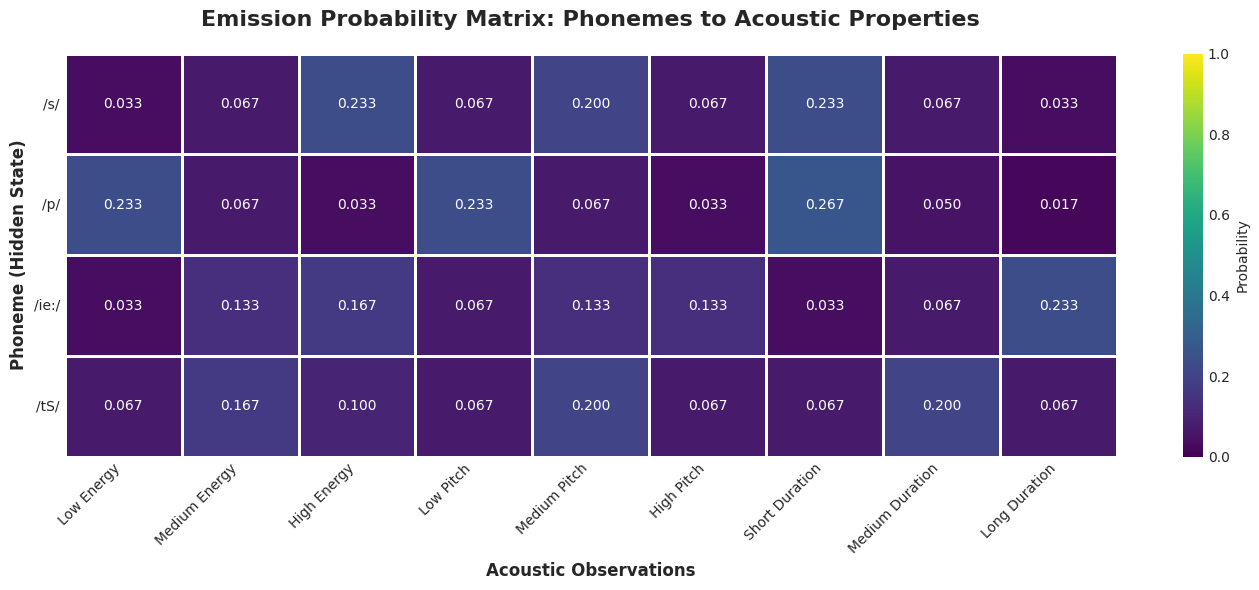

In [10]:
# Create a heatmap for emission probabilities
plt.figure(figsize=(14, 6))
sns.heatmap(emission_df, annot=True, fmt='.3f', cmap='viridis', 
            cbar_kws={'label': 'Probability'}, linewidths=1, linecolor='white',
            vmin=0, vmax=1)
plt.title('Emission Probability Matrix: Phonemes to Acoustic Properties', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Acoustic Observations', fontsize=12, fontweight='bold')
plt.ylabel('Phoneme (Hidden State)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

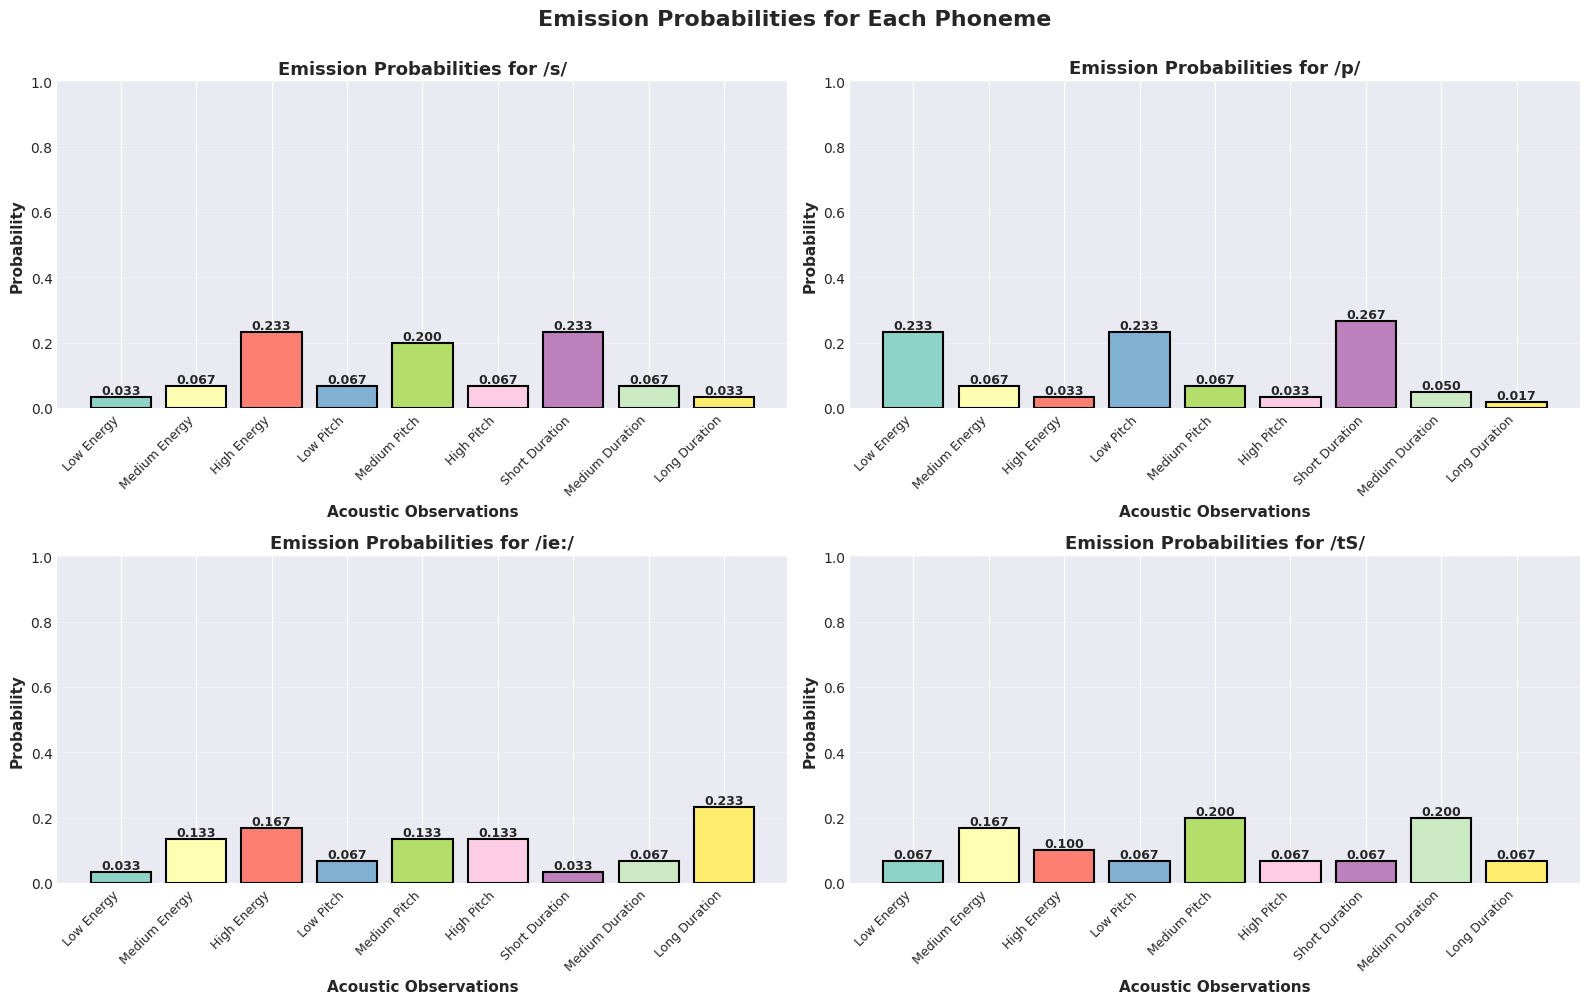

In [11]:
# Create grouped bar chart for emission probabilities
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, state in enumerate(states):
    ax = axes[idx]
    probs = emission_matrix[idx]
    colors = plt.cm.Set3(np.linspace(0, 1, n_observations))
    
    bars = ax.bar(range(n_observations), probs, color=colors, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, prob) in enumerate(zip(bars, probs)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_xlabel('Acoustic Observations', fontsize=11, fontweight='bold')
    ax.set_ylabel('Probability', fontsize=11, fontweight='bold')
    ax.set_title(f'Emission Probabilities for {state}', 
                 fontsize=13, fontweight='bold')
    ax.set_xticks(range(n_observations))
    ax.set_xticklabels(observations, rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Emission Probabilities for Each Phoneme', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [12]:
class HiddenMarkovModel:
    """
    Hidden Markov Model for phoneme recognition in speech processing
    """
    
    def __init__(self, states, observations, initial_prob, transition_matrix, emission_matrix):
        self.states = states
        self.observations = observations
        self.initial_prob = initial_prob
        self.transition_matrix = transition_matrix
        self.emission_matrix = emission_matrix
        self.n_states = len(states)
        self.n_observations = len(observations)
    
    def generate_sequence(self, length):
        """
        Generate a sequence of states and observations
        """
        state_sequence = []
        observation_sequence = []
        
        # Start with initial state
        current_state = np.random.choice(self.n_states, p=self.initial_prob)
        
        for _ in range(length):
            state_sequence.append(current_state)
            
            # Generate observation from current state
            obs = np.random.choice(self.n_observations, 
                                 p=self.emission_matrix[current_state])
            observation_sequence.append(obs)
            
            # Transition to next state
            current_state = np.random.choice(self.n_states, 
                                            p=self.transition_matrix[current_state])
        
        return state_sequence, observation_sequence
    
    def forward_algorithm(self, observation_sequence):
        """
        Forward algorithm to compute P(observations | model)
        """
        T = len(observation_sequence)
        alpha = np.zeros((T, self.n_states))
        
        # Initialization
        alpha[0] = self.initial_prob * self.emission_matrix[:, observation_sequence[0]]
        
        # Induction
        for t in range(1, T):
            for j in range(self.n_states):
                alpha[t, j] = np.sum(alpha[t-1] * self.transition_matrix[:, j]) * \
                              self.emission_matrix[j, observation_sequence[t]]
        
        # Termination
        prob = np.sum(alpha[-1])
        return alpha, prob
    
    def viterbi_algorithm(self, observation_sequence):
        """
        Viterbi algorithm to find most likely state sequence
        """
        T = len(observation_sequence)
        delta = np.zeros((T, self.n_states))
        psi = np.zeros((T, self.n_states), dtype=int)
        
        # Initialization
        delta[0] = self.initial_prob * self.emission_matrix[:, observation_sequence[0]]
        
        # Recursion
        for t in range(1, T):
            for j in range(self.n_states):
                temp = delta[t-1] * self.transition_matrix[:, j]
                psi[t, j] = np.argmax(temp)
                delta[t, j] = np.max(temp) * self.emission_matrix[j, observation_sequence[t]]
        
        # Backtracking
        path = np.zeros(T, dtype=int)
        path[-1] = np.argmax(delta[-1])
        
        for t in range(T-2, -1, -1):
            path[t] = psi[t+1, path[t+1]]
        
        return path, np.max(delta[-1])

# Create HMM instance
hmm = HiddenMarkovModel(states, observations, initial_prob, 
                        transition_matrix, emission_matrix)

print("✓ HMM Model created successfully!")
print(f"  - Number of states: {hmm.n_states}")
print(f"  - Number of observations: {hmm.n_observations}")

✓ HMM Model created successfully!
  - Number of states: 4
  - Number of observations: 9


In [13]:
# Generate multiple sequences
np.random.seed(42)
n_sequences = 5
sequence_length = 8

print("Generated Sequences from HMM:")
print("=" * 80)

all_state_sequences = []
all_observation_sequences = []

for i in range(n_sequences):
    state_seq, obs_seq = hmm.generate_sequence(sequence_length)
    all_state_sequences.append(state_seq)
    all_observation_sequences.append(obs_seq)
    
    print(f"\nSequence {i+1}:")
    print(f"  States:       {' → '.join([states[s] for s in state_seq])}")
    print(f"  Observations: {' → '.join([observations[o] for o in obs_seq])}")

Generated Sequences from HMM:

Sequence 1:
  States:       /s/ → /p/ → /p/ → /p/ → /ie:/ → /ie:/ → /tS/ → /tS/
  Observations: Medium Duration → Medium Pitch → Low Energy → Short Duration → Medium Duration → Long Duration → Medium Energy → Medium Energy

Sequence 2:
  States:       /s/ → /p/ → /p/ → /ie:/ → /tS/ → /tS/ → /tS/ → /tS/
  Observations: Medium Pitch → Medium Pitch → Medium Energy → Medium Pitch → Medium Energy → Medium Pitch → High Pitch → Low Energy

Sequence 3:
  States:       /s/ → /p/ → /ie:/ → /ie:/ → /ie:/ → /ie:/ → /tS/ → /tS/
  Observations: Short Duration → Low Energy → Medium Pitch → Medium Pitch → Long Duration → High Pitch → Medium Pitch → Medium Energy

Sequence 4:
  States:       /s/ → /p/ → /tS/ → /tS/ → /tS/ → /tS/ → /tS/ → /tS/
  Observations: Medium Duration → Medium Pitch → Medium Energy → Low Energy → Low Pitch → Medium Duration → High Energy → Medium Energy

Sequence 5:
  States:       /s/ → /p/ → /p/ → /ie:/ → /tS/ → /tS/ → /tS/ → /tS/
  Observations: 

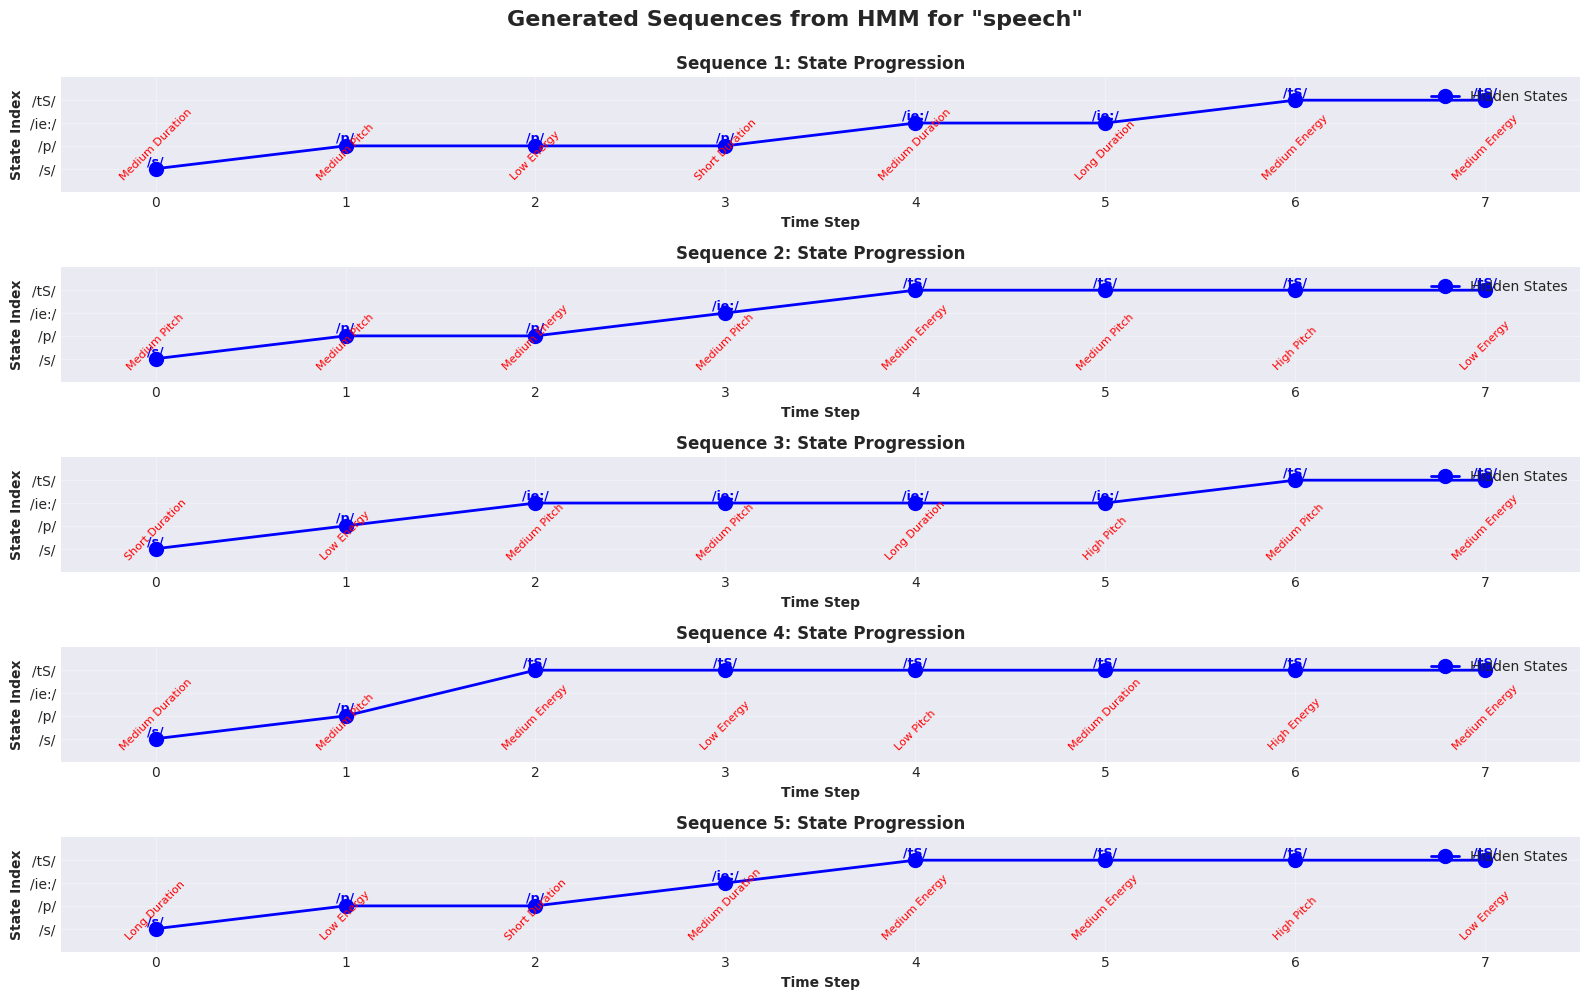

In [14]:
# Visualize the generated sequences
fig, axes = plt.subplots(n_sequences, 1, figsize=(16, 10))

for idx in range(n_sequences):
    ax = axes[idx]
    state_seq = all_state_sequences[idx]
    obs_seq = all_observation_sequences[idx]
    
    # Create timeline
    time_steps = range(len(state_seq))
    
    # Plot states
    ax.plot(time_steps, state_seq, 'o-', linewidth=2, markersize=10, 
            label='Hidden States', color='blue')
    
    # Add state labels
    for t, s in zip(time_steps, state_seq):
        ax.text(t, s + 0.15, states[s], ha='center', fontsize=9, 
               fontweight='bold', color='blue')
    
    # Add observation labels
    for t, o in zip(time_steps, obs_seq):
        ax.text(t, -0.5, observations[o], ha='center', fontsize=8, 
               rotation=45, color='red')
    
    ax.set_ylim(-1, n_states)
    ax.set_xlim(-0.5, len(state_seq)-0.5)
    ax.set_xlabel('Time Step', fontsize=10, fontweight='bold')
    ax.set_ylabel('State Index', fontsize=10, fontweight='bold')
    ax.set_title(f'Sequence {idx+1}: State Progression', 
                 fontsize=12, fontweight='bold')
    ax.set_yticks(range(n_states))
    ax.set_yticklabels(states)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

plt.suptitle('Generated Sequences from HMM for "speech"', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [15]:
# Apply forward algorithm to a sample observation sequence
sample_obs_indices = all_observation_sequences[0]

print("Forward Algorithm Demonstration")
print("=" * 80)
print(f"\nObservation Sequence:")
print(f"  {' → '.join([observations[o] for o in sample_obs_indices])}")
print(f"\nObservation Indices: {sample_obs_indices}")

alpha, forward_prob = hmm.forward_algorithm(sample_obs_indices)

print(f"\nForward Probabilities (Alpha) Matrix:")
print(f"  Shape: {alpha.shape} (time_steps x states)")
print("\nAlpha values:")
alpha_df = pd.DataFrame(alpha, columns=states)
alpha_df.index.name = 'Time'
print(alpha_df)

print(f"\n✓ Total Probability P(Observations | Model) = {forward_prob:.6e}")

Forward Algorithm Demonstration

Observation Sequence:
  Medium Duration → Medium Pitch → Low Energy → Short Duration → Medium Duration → Long Duration → Medium Energy → Medium Energy

Observation Indices: [7, 4, 0, 6, 7, 8, 1, 1]

Forward Probabilities (Alpha) Matrix:
  Shape: (8, 4) (time_steps x states)

Alpha values:
               /s/           /p/         /ie:/          /tS/
Time                                                        
0     6.666667e-02  0.000000e+00  0.000000e+00  0.000000e+00
1     2.666667e-03  3.111111e-03  8.888889e-04  0.000000e+00
2     1.777778e-05  5.807407e-04  9.037037e-05  6.222222e-05
3     8.296296e-07  3.429136e-05  1.451358e-05  1.223704e-05
4     1.106173e-08  3.719506e-07  1.896066e-06  5.165136e-06
5     7.374486e-11  1.368889e-09  1.937347e-07  4.353051e-07
6     9.832647e-13  2.169328e-11  7.878132e-09  9.517605e-08
7     1.311020e-14  3.351294e-13  3.171631e-10  1.678215e-08

✓ Total Probability P(Observations | Model) = 1.709966e-08


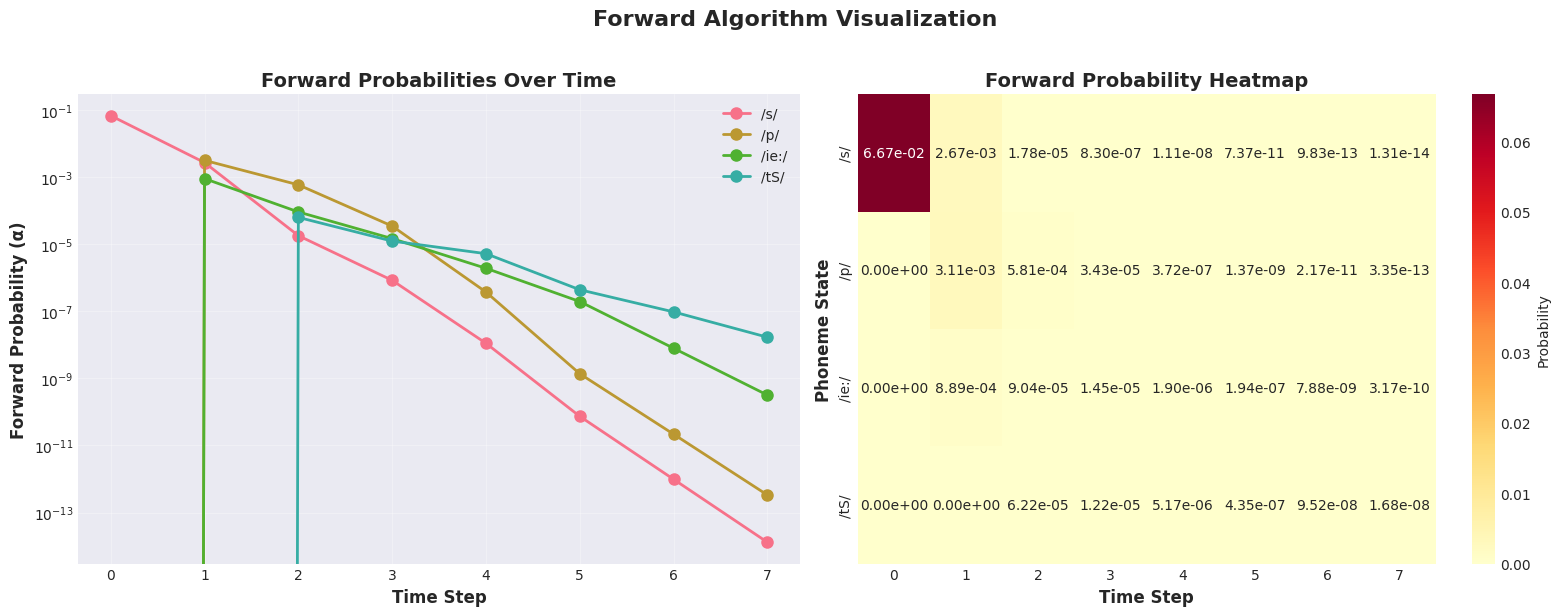

In [16]:
# Visualize forward probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Alpha values over time
for i, state in enumerate(states):
    ax1.plot(range(len(alpha)), alpha[:, i], marker='o', linewidth=2, 
            label=state, markersize=8)

ax1.set_xlabel('Time Step', fontsize=12, fontweight='bold')
ax1.set_ylabel('Forward Probability (α)', fontsize=12, fontweight='bold')
ax1.set_title('Forward Probabilities Over Time', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Plot 2: Heatmap of alpha values
sns.heatmap(alpha.T, annot=True, fmt='.2e', cmap='YlOrRd', 
            yticklabels=states, cbar_kws={'label': 'Probability'}, ax=ax2)
ax2.set_xlabel('Time Step', fontsize=12, fontweight='bold')
ax2.set_ylabel('Phoneme State', fontsize=12, fontweight='bold')
ax2.set_title('Forward Probability Heatmap', fontsize=14, fontweight='bold')

plt.suptitle('Forward Algorithm Visualization', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
# Apply Viterbi algorithm to find most likely state sequence
print("Viterbi Algorithm Demonstration")
print("=" * 80)
print(f"\nObservation Sequence:")
print(f"  {' → '.join([observations[o] for o in sample_obs_indices])}")

viterbi_path, viterbi_prob = hmm.viterbi_algorithm(sample_obs_indices)

print(f"\nMost Likely State Sequence (Viterbi Path):")
print(f"  {' → '.join([states[s] for s in viterbi_path])}")
print(f"\nState Indices: {viterbi_path}")
print(f"\n✓ Path Probability = {viterbi_prob:.6e}")

# Compare with actual sequence
actual_states = all_state_sequences[0]
print(f"\nActual State Sequence:")
print(f"  {' → '.join([states[s] for s in actual_states])}")
print(f"\nAccuracy: {np.sum(viterbi_path == actual_states) / len(actual_states) * 100:.1f}%")

Viterbi Algorithm Demonstration

Observation Sequence:
  Medium Duration → Medium Pitch → Low Energy → Short Duration → Medium Duration → Long Duration → Medium Energy → Medium Energy

Most Likely State Sequence (Viterbi Path):
  /s/ → /s/ → /p/ → /ie:/ → /tS/ → /tS/ → /tS/ → /tS/

State Indices: [0 0 1 2 3 3 3 3]

✓ Path Probability = 2.634842e-09

Actual State Sequence:
  /s/ → /p/ → /p/ → /p/ → /ie:/ → /ie:/ → /tS/ → /tS/

Accuracy: 50.0%


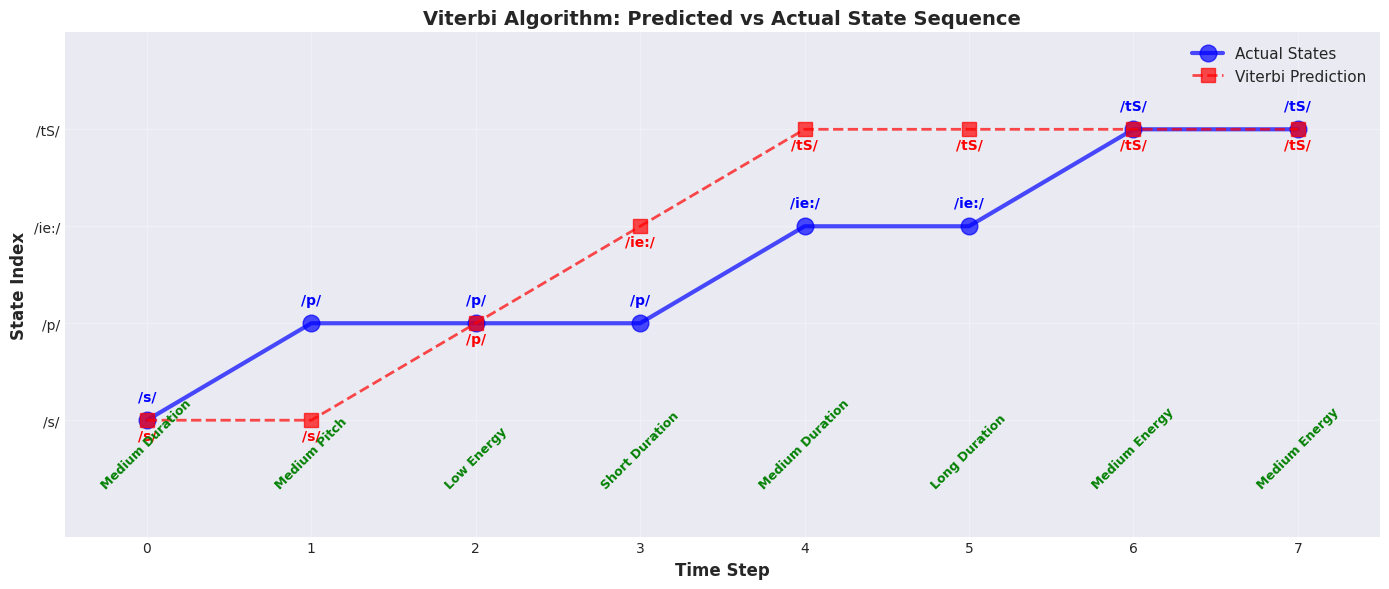

In [18]:
# Visualize Viterbi path vs actual path
fig, ax = plt.subplots(figsize=(14, 6))

time_steps = range(len(viterbi_path))

# Plot actual states
ax.plot(time_steps, actual_states, 'o-', linewidth=3, markersize=12, 
        label='Actual States', color='blue', alpha=0.7)

# Plot Viterbi predicted states
ax.plot(time_steps, viterbi_path, 's--', linewidth=2, markersize=10, 
        label='Viterbi Prediction', color='red', alpha=0.7)

# Add labels
for t in time_steps:
    ax.text(t, actual_states[t] + 0.2, states[actual_states[t]], 
           ha='center', fontsize=10, fontweight='bold', color='blue')
    ax.text(t, viterbi_path[t] - 0.2, states[viterbi_path[t]], 
           ha='center', fontsize=10, fontweight='bold', color='red')

# Add observation labels at bottom
for t, o in zip(time_steps, sample_obs_indices):
    ax.text(t, -0.7, observations[o], ha='center', fontsize=9, 
           rotation=45, color='green', fontweight='bold')

ax.set_ylim(-1.2, n_states)
ax.set_xlim(-0.5, len(viterbi_path)-0.5)
ax.set_xlabel('Time Step', fontsize=12, fontweight='bold')
ax.set_ylabel('State Index', fontsize=12, fontweight='bold')
ax.set_title('Viterbi Algorithm: Predicted vs Actual State Sequence', 
            fontsize=14, fontweight='bold')
ax.set_yticks(range(n_states))
ax.set_yticklabels(states)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Simulate the complete word "speech" phoneme sequence
print("Complete Word 'speech' Phoneme Simulation")
print("=" * 80)

# Create a realistic sequence that follows: /s/ → /p/ → /ie:/ → /tS/
speech_states = [0, 0, 1, 1, 2, 2, 2, 3, 3]  # Indices for phonemes
speech_obs = []

np.random.seed(123)
for state in speech_states:
    # Generate observation based on emission probabilities
    obs = np.random.choice(n_observations, p=emission_matrix[state])
    speech_obs.append(obs)

print("\nPhoneme Sequence for 'speech':")
print(f"  {' → '.join([states[s] for s in speech_states])}")

print("\nAcoustic Observations:")
print(f"  {' → '.join([observations[o] for o in speech_obs])}")

# Run forward algorithm
alpha_speech, prob_speech = hmm.forward_algorithm(speech_obs)
print(f"\nP(Observations | Model) = {prob_speech:.6e}")

# Run Viterbi algorithm
viterbi_speech, viterbi_prob_speech = hmm.viterbi_algorithm(speech_obs)
print(f"\nViterbi Decoded Sequence:")
print(f"  {' → '.join([states[s] for s in viterbi_speech])}")
print(f"  Path Probability = {viterbi_prob_speech:.6e}")

accuracy = np.sum(np.array(viterbi_speech) == np.array(speech_states)) / len(speech_states) * 100
print(f"\nDecoding Accuracy: {accuracy:.1f}%")

Complete Word 'speech' Phoneme Simulation

Phoneme Sequence for 'speech':
  /s/ → /s/ → /p/ → /p/ → /ie:/ → /ie:/ → /ie:/ → /tS/ → /tS/

Acoustic Observations:
  Short Duration → High Energy → Low Energy → Low Pitch → Medium Duration → Medium Pitch → Long Duration → Short Duration → Medium Pitch

P(Observations | Model) = 5.639260e-09

Viterbi Decoded Sequence:
  /s/ → /s/ → /p/ → /ie:/ → /tS/ → /tS/ → /tS/ → /tS/ → /tS/
  Path Probability = 2.065716e-09

Decoding Accuracy: 55.6%


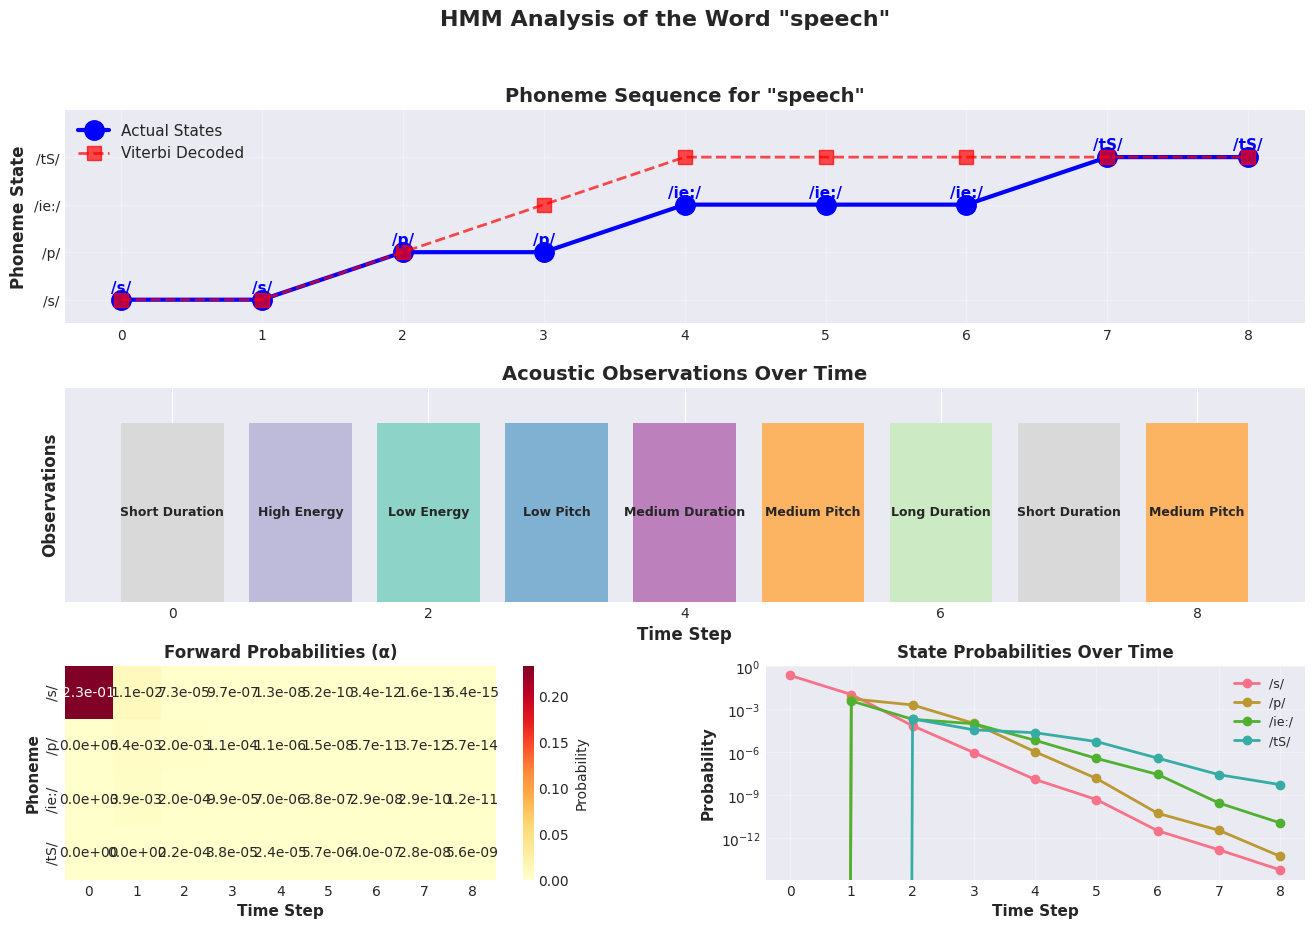

In [20]:
# Create comprehensive visualization for the word "speech"
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: State sequence
ax1 = fig.add_subplot(gs[0, :])
time_steps = range(len(speech_states))

ax1.plot(time_steps, speech_states, 'o-', linewidth=3, markersize=14, 
        color='blue', label='Actual States')
ax1.plot(time_steps, viterbi_speech, 's--', linewidth=2, markersize=10, 
        color='red', alpha=0.7, label='Viterbi Decoded')

for t, s in enumerate(speech_states):
    ax1.text(t, s + 0.15, states[s], ha='center', fontsize=11, 
            fontweight='bold', color='blue')

ax1.set_ylim(-0.5, n_states)
ax1.set_ylabel('Phoneme State', fontsize=12, fontweight='bold')
ax1.set_title('Phoneme Sequence for "speech"', fontsize=14, fontweight='bold')
ax1.set_yticks(range(n_states))
ax1.set_yticklabels(states)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Observations
ax2 = fig.add_subplot(gs[1, :])
obs_numeric = [observations[o][:10] for o in speech_obs]  # Shortened names
ax2.bar(time_steps, [1]*len(time_steps), color=plt.cm.Set3(np.array(speech_obs)/n_observations))

for t, o in enumerate(speech_obs):
    ax2.text(t, 0.5, observations[o], ha='center', va='center', 
            fontsize=9, fontweight='bold', rotation=0)

ax2.set_ylim(0, 1.2)
ax2.set_ylabel('Observations', fontsize=12, fontweight='bold')
ax2.set_title('Acoustic Observations Over Time', fontsize=14, fontweight='bold')
ax2.set_yticks([])
ax2.set_xlabel('Time Step', fontsize=12, fontweight='bold')

# Plot 3: Forward probabilities heatmap
ax3 = fig.add_subplot(gs[2, 0])
sns.heatmap(alpha_speech.T, annot=True, fmt='.1e', cmap='YlOrRd', 
           yticklabels=states, cbar_kws={'label': 'Probability'}, ax=ax3)
ax3.set_xlabel('Time Step', fontsize=11, fontweight='bold')
ax3.set_ylabel('Phoneme', fontsize=11, fontweight='bold')
ax3.set_title('Forward Probabilities (α)', fontsize=12, fontweight='bold')

# Plot 4: State probability evolution
ax4 = fig.add_subplot(gs[2, 1])
for i, state in enumerate(states):
    ax4.plot(range(len(alpha_speech)), alpha_speech[:, i], 
            marker='o', linewidth=2, label=state, markersize=6)

ax4.set_xlabel('Time Step', fontsize=11, fontweight='bold')
ax4.set_ylabel('Probability', fontsize=11, fontweight='bold')
ax4.set_title('State Probabilities Over Time', fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.suptitle('HMM Analysis of the Word "speech"', fontsize=16, fontweight='bold')
plt.show()

In [22]:
# Generate summary statistics
print("HMM Model Summary and Evaluation")
print("=" * 80)

print("\n1. MODEL PARAMETERS:")
print(f"   - Hidden States: {n_states} phonemes")
print(f"   - Observations: {n_observations} acoustic properties")
print(f"   - Total transition probabilities: {transition_matrix.size}")
print(f"   - Total emission probabilities: {emission_matrix.size}")

print("\n2. TRANSITION ANALYSIS:")
for i, state in enumerate(states):
    outgoing = transition_matrix[i]
    most_likely = np.argmax(outgoing)
    print(f"   From {state}:")
    print(f"     - Most likely next state: {states[most_likely]} ({outgoing[most_likely]:.2f})")
    print(f"     - Self-transition prob: {outgoing[i]:.2f}")

print("\n3. EMISSION ANALYSIS:")
for i, state in enumerate(states):
    emissions = emission_matrix[i]
    top_3 = np.argsort(emissions)[-3:][::-1]
    print(f"   {state} - Top 3 observations:")
    for idx in top_3:
        print(f"     - {observations[idx]}: {emissions[idx]:.3f}")

print("\n4. DECODING PERFORMANCE:")
print(f"   - Speech sequence accuracy: {accuracy:.1f}%")
print(f"   - Observation likelihood: {prob_speech:.6e}")
# print(f"   - Viterbi path probability: {viterbi_prob_speech:.

HMM Model Summary and Evaluation

1. MODEL PARAMETERS:
   - Hidden States: 4 phonemes
   - Observations: 9 acoustic properties
   - Total transition probabilities: 16
   - Total emission probabilities: 36

2. TRANSITION ANALYSIS:
   From /s/:
     - Most likely next state: /p/ (0.70)
     - Self-transition prob: 0.20
   From /p/:
     - Most likely next state: /ie:/ (0.70)
     - Self-transition prob: 0.20
   From /ie:/:
     - Most likely next state: /tS/ (0.70)
     - Self-transition prob: 0.30
   From /tS/:
     - Most likely next state: /tS/ (1.00)
     - Self-transition prob: 1.00

3. EMISSION ANALYSIS:
   /s/ - Top 3 observations:
     - Short Duration: 0.233
     - High Energy: 0.233
     - Medium Pitch: 0.200
   /p/ - Top 3 observations:
     - Short Duration: 0.267
     - Low Energy: 0.233
     - Low Pitch: 0.233
   /ie:/ - Top 3 observations:
     - Long Duration: 0.233
     - High Energy: 0.167
     - Medium Pitch: 0.133
   /tS/ - Top 3 observations:
     - Medium Duration: 